<a href="https://colab.research.google.com/github/srudkin12/RegionalBallMapper/blob/main/Session_4_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Session 4**

Session 4 of the Topological Data Analysis Ball Mapper for Regional Analysis workshop is designed to be an informal look at some of the further functionality of BallMapper and a chance for participants to have a look at their own data. 

This notebook contains the results on regressions and the visualisation of residuals using BallMapper. Again you are encouraged to use this notebook in conjunction with the commentary file.

Because this is a separate Colab notebook we need to install the packages and read in the data. The following block of code completes these steps.

In [2]:
install.packages("dplyr")
install.packages("BallMapper")
install.packages("car")
library(dplyr)
library(BallMapper)
library(car)

url = 'https://raw.githubusercontent.com/srudkin12/RegionalBallMapper/main/region1.csv'
dtx<-read.table(url,sep=",",header=TRUE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




We now create our subset of variables as in Session 3

In [3]:
dty<-cbind(dtx[,1:2],dtx$QualLevel4,dtx$Deprivation0,dtx$Accommodation,dtx$Married,dtx$HealthVeryGood,dtx$OwnedMortgage)
names(dty)<-c("geog","geogcode","QualLevel4","Deprivation0","Accommodation","Married","HealthVeryGood","OwnedMortgage")
dty$QL4<-as.numeric(dty$QualLevel4>33) # Areas where more than 1/3rd have Degrees

In many regional datasets there are issues with strong correlations between variables. Therefore we must perform checks for multicollinearity

We first check for correlations of 0.7 or above

In [4]:
cor(dty[,3:9])

,QualLevel4,Deprivation0,Accommodation,Married,HealthVeryGood,OwnedMortgage,QL4
QualLevel4,1.00000000,0.5567067,0.03445113,-0.15119122,0.83737769,-0.27369213,0.75816744
Deprivation0,0.55670673,1.0000000,-0.33698590,0.58474351,0.64301390,0.45302641,0.35214189
Accommodation,0.03445113,-0.3369859,1.00000000,-0.26588049,-0.12868400,-0.66039840,0.06835404
Married,-0.15119122,0.5847435,-0.26588049,1.00000000,-0.07519867,0.56762522,-0.14797639
HealthVeryGood,0.83737769,0.6430139,-0.12868400,-0.07519867,1.00000000,0.02783632,0.63394502
OwnedMortgage,-0.27369213,0.4530264,-0.66039840,0.56762522,0.02783632,1.00000000,-0.23117919
QL4,0.75816744,0.3521419,0.06835404,-0.14797639,0.63394502,-0.23117919,1.00000000


The highest absolute correlation is -0.660 between OwnedMortgage and Accommodation. This does not exceed the 0.7 threshold in absolute value

The second approach is to use the variance inflation function. If you are unsure of the role of the VIF then please consult statistics books or web resources. For our purposes we are interested in whether there is a VIF above 10

In [6]:
lm1<-lm(QualLevel4~Deprivation0+Accommodation+Married+HealthVeryGood+OwnedMortgage,data=dty)
vif(lm1)

Deprivation0  Accommodation        Married HealthVeryGood  OwnedMortgage 
      5.731354       1.874453       3.475358       3.670944       2.540742

The highest VIF is well below the 10 threshold and so we will continue to use the lm1 model.

We can produce a summary of the model using the following line of code:

In [7]:
summary(lm1)


Call:
lm(formula = QualLevel4 ~ Deprivation0 + Accommodation + Married + 
    HealthVeryGood + OwnedMortgage, data = dty)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8954 -1.7347 -0.0764  1.7694 15.3443 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -13.67329    3.81260  -3.586 0.000384 ***
Deprivation0     0.69207    0.05928  11.674  < 2e-16 ***
Accommodation   -0.38520    0.11170  -3.448 0.000634 ***
Married         -0.22090    0.04409  -5.010 8.75e-07 ***
HealthVeryGood   1.00547    0.08335  12.063  < 2e-16 ***
OwnedMortgage   -0.72279    0.04655 -15.528  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.924 on 342 degrees of freedom
Multiple R-squared:  0.8621,	Adjusted R-squared:  0.8601 
F-statistic: 427.7 on 5 and 342 DF,  p-value: < 2.2e-16


We will now use the fitted() function to create a new column of fitted values from the model lm1. This is stored as fit1. 

In [8]:
dty$fit1<-fitted(lm1)

We may create a column of residuals by subtracting the fitted value from the true value of QualLevel4

In [10]:
dty$res1<-dty$QualLevel4-dty$fit1

Now we have two extra outcomes to colour our BallMapper plot. The following code is built from the block in Session 3, but also includes the two new outputs. Notice that we also create the characteristics as a separate data.frame and then normalise using the function in the BallMapper package

In [11]:
y1<-as.data.frame(dty$QualLevel4)
y2<-as.data.frame(dty$QL4)
y3<-as.data.frame(dty$fit1)
y4<-as.data.frame(dty$res1)

x1<-as.data.frame(dty[,4:8])

x2<-normalize_to_min_0_max_1(x1)

Let us now produce three BallMapper plots. One of the true value (t), one of the fitted values (f) and one of the residuals (r). Here we continue with the 0.3 radius identified in Session 3.

Note that the code does not actually plot the BallMapper graphs so there will be no output

In [12]:
bm130t<-BallMapper(x2,y1,0.3)
bm130f<-BallMapper(x2,y3,0.3) 
bm130r<-BallMapper(x2,y4,0.3)  

We may plot the BallMapper graphs using the plot function. Again to see the others the code may be slightly edited to replace the letter after bm130

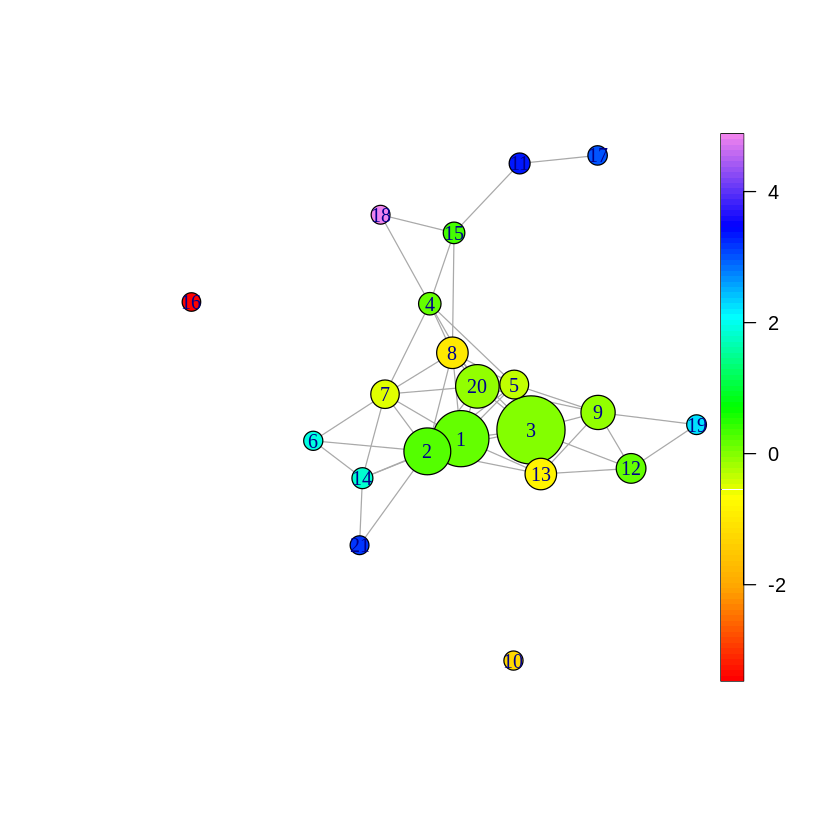

In [13]:
ColorIgraphPlot(bm130r,seed_for_plotting=123)

An interesting result emerges here because the residuals are all positive on the edges of the graph, the main body has residuals near 0 as would be expected. The only strong negative residual appears in the outlier

We will now bring in the user defined function points_to_balls and follow the same steps as in Session 3 to identify the local authority districts in ball 16

In [14]:
dty$pt<-seq(1:nrow(dty))

points_to_balls<-function(l){
  a001<-length(l$landmarks)
  a1<-matrix(0,nrow=a001,ncol=2)
  a1<-as.data.frame(a1)
  names(a1)<-c("pt","ball")
  for(i in 1:a001){
    a<-as.data.frame(l$points_covered_by_landmarks[i])
    names(a)<-"pt"
    a$ball<-i
    a1<-rbind.data.frame(a1,a)
   }
  a1<-a1[2:nrow(a1),]
  return(a1)
}

bmp1<-points_to_balls(bm130r)
bmp1<-as.data.frame(bmp1)
names(bmp1)<-c("pt","ball")

dtz<-merge(dty,bmp1,by="pt")

dtz16<-subset(dtz,dtz$ball==16)
dtz16

,pt,geog,geogcode,QualLevel4,Deprivation0,Accommodation,Married,HealthVeryGood,OwnedMortgage,QL4,fit1,res1,ball
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
325,150,Isles of Scilly,E06000053,33.01023,38.42265,23.8749,53.63942,51.52065,10.01011,1,36.43936,-3.429131,16


We can see that the region where the model overpredicts is the Isles of Scilly. Here the low OwnedMortgage would suggest a higher QualLevel4 than is observed given the negative coefficient on OwnedMortgage in the model. 

There are many more things that we may wish to do with modelling and considering residuals. For example we may look at binary classification models for the QL4 dummy. This workshop is intended to provide the basic building blocks for using Topological Data Analysis Ball Mapper.